+ One way Analysis of Variance (ANOVA) -  learnt in Week 7
+ Kruskal Wallis test - learnt in Week 8
+ Chi Square Goodness of Fit test - learnt in Week 9/10
+ Chi Square Tests for Independence / Association Test - learnt in Week 9/10

In [1]:
# import libraries
!pip install researchpy
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import researchpy as rp
from scipy.stats import stats

In [36]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir, 'data', 'interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace=True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()

print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 3 rows
df.head(3)

Numeric columns:  ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'rank', 'score'] 

String columns:  ['name', 'region', 'team', 'affiliate', 'gender', 'eat', 'train', 'background', 'experience', 'schedule', 'division'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  991 non-null    Int64 
 1   name        991 non-null    string
 2   region      991 non-null    string
 3   team        991 non-null    string
 4   affiliate   991 non-null    string
 5   gender      991 non-null    string
 6   age         991 non-null    Int64 
 7   height      991 non-null    Int64 
 8   weight      991 non-null    Int64 
 9   fran        991 non-null    Int64 
 10  helen       991 non-null    Int64 
 11  grace       991 non-null    Int6

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
0,2720,justin adams,south central,woodward crossfit,woodward crossfit,male,24,68,180,126,...,405,80,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,3448,464
1,6922,daniel adamson,south west,crossfit the point,crossfit the point,male,31,67,150,244,...,330,42,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i inc...,i played college sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|i do multipl...,male,35748,712
2,12563,steven lee adams,mid atlantic,crossfit kaiju,crossfit kaiju,male,37,72,210,162,...,425,49,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i inc...,i played youth or high school level sports|i p...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|i ty...,male,5073,485


# HOMOGENEITY OF VARIANCE

testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the levene() method from Scipy.stats.

In [37]:
# stats.levene(*[df['score'][df['region'] == region] for region in df.region.unique()])

## -------> OBSERVATION
The Levene's test of homogeneity of variances is not significant which indicates that the groups have non-statistically significant difference in their varability. Again, it may be worthwhile to check this assumption visually as well.

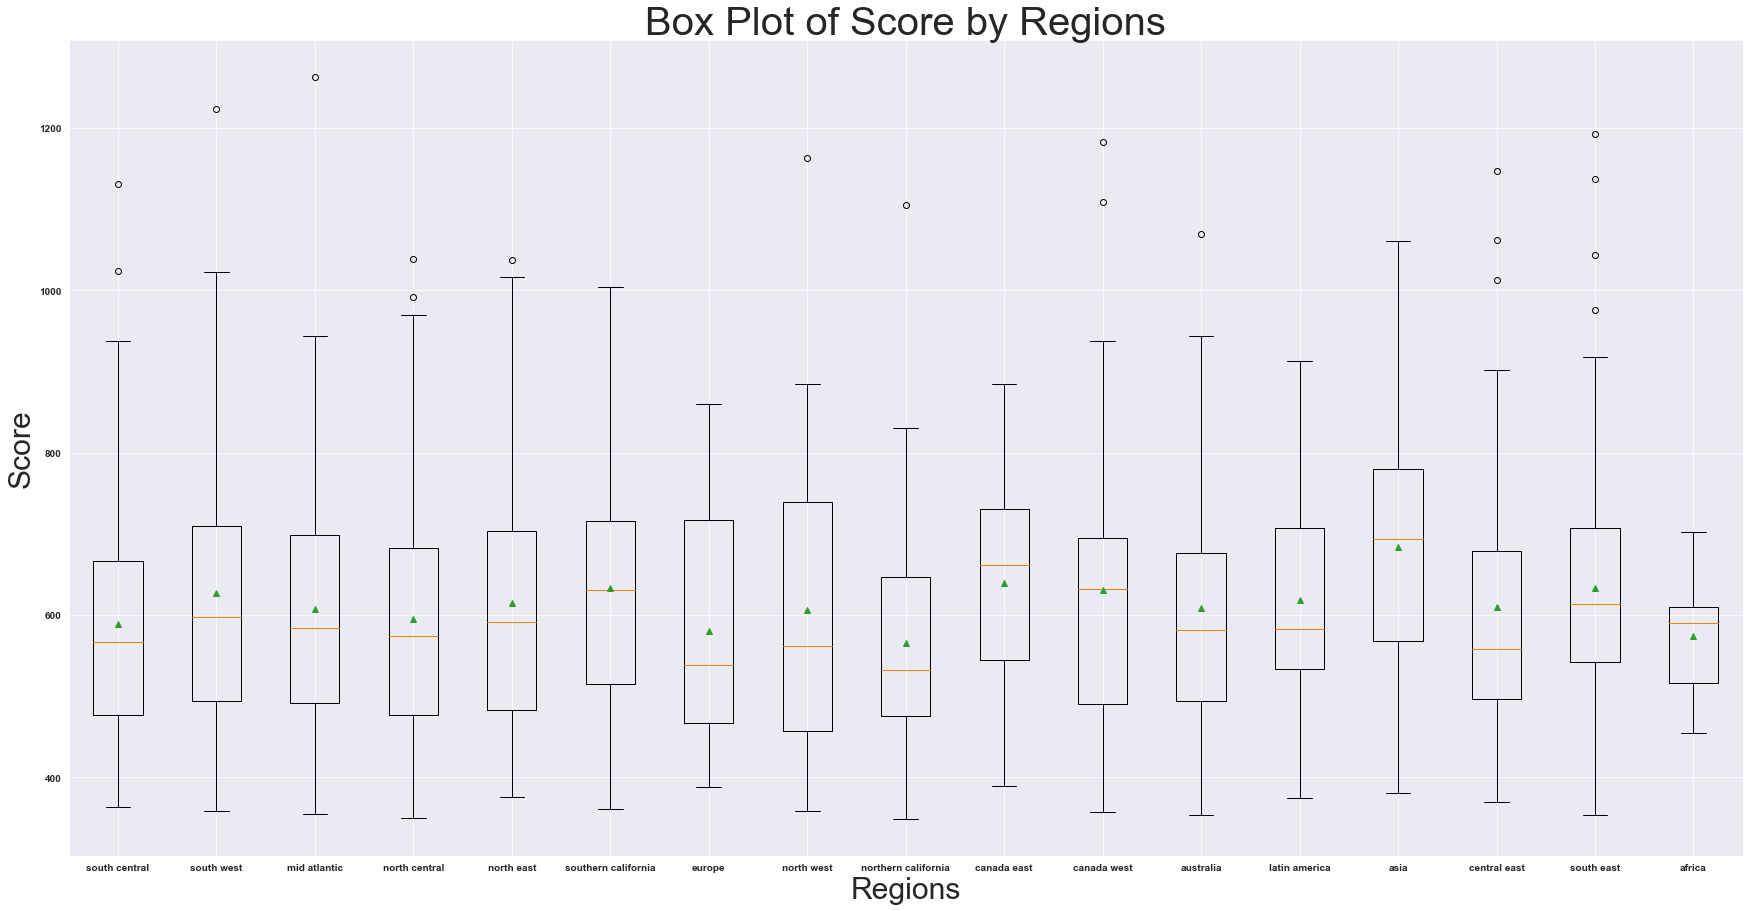

In [45]:
data = [*[df['score'][df['region'] == region] for region in df.region.unique()]]

fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Score by Regions", fontsize=40)
ax.set

ax.boxplot(data,
           labels=[region for region in df.region.unique()],
           showmeans=True)

plt.xlabel("Regions", fontsize=30)
plt.ylabel("Score", fontsize=30)
# bolden the labels
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

### ------> OBSERVATIONS
The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have equal variance.

By default box plots show the median (orange line in graph above). The green triangle is the mean for each group which was an additional argument that was passed into the method.

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>One way Analysis of Variance (ANOVA)</strong></h1>

## ANOVA Hypotheses
+ Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp
+ Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

### Parametric test assumptions
+ Population distributions are normal
+ Samples have equal variances
+ Independence

## ANOVA Assumptions
+ Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
+ Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
+ The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).


## How ANOVA works?
+ Check sample sizes: equal number of observation in each group
+ Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
+ Calculate Mean Square error (MSE) (SS error/df of residuals)
+ Calculate F value (MS of group/MSE)
+ Calculate p value based on F value and degrees of freedom (df)

## Questions?
+ Imbalance label problem (unequal sample size for each group) data


| **ANOVA Source** | **df** | **SS** | **MS**          | **F**    | **Notes**           |
|:----------------:|:------:|:------:|:---------------:|:--------:|:-------------------:|
| **Treatments**   |  k-1   | SSTr   | MSTr=SSTr/(k-1) | MSTr/MSE | k: number of groups |
| **Errors**       |  n-k   | SSE    | MSE=SSE/(n-k)   |          | n: sample size      |
| **Total**        |  n-1   | SST    |                 |          |                     |


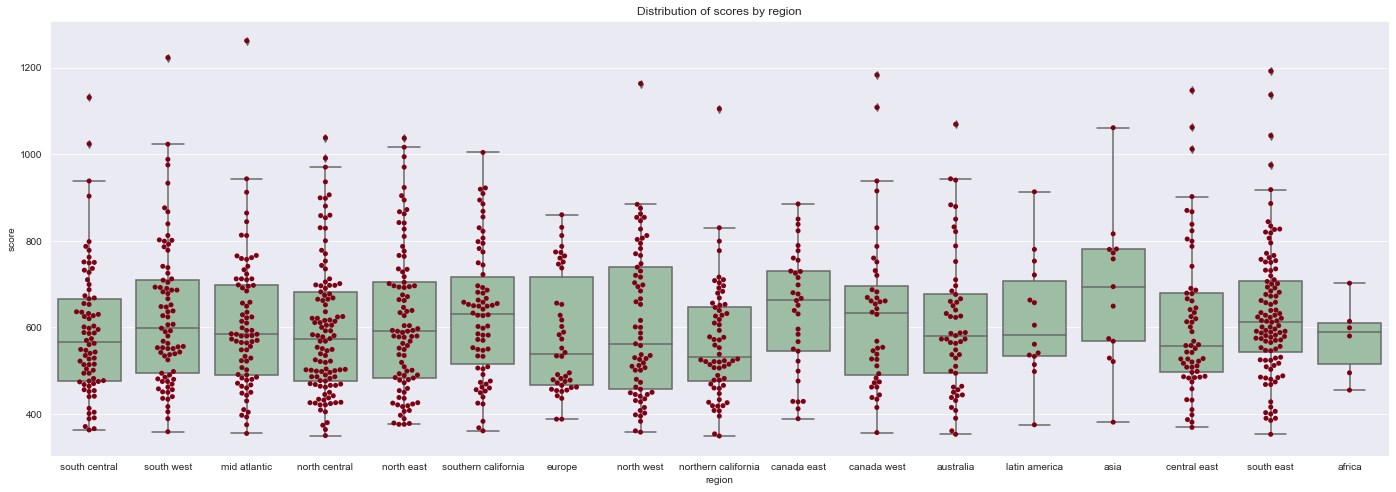

In [5]:
# generate a boxplot to see the data Distribution of scores by region. Using boxplot, we can
# easily detect the differences between different regions
import matplotlib.pyplot as plt
import seaborn as sns

# set with and height of the figure
plt.figure(figsize=(24, 8))
ax = sns.boxplot(x='region', y='score', data=df, color='#99c2a2')
ax = sns.swarmplot(x="region", y="score", data=df, color='#7d0013')
# set title with matplotlib
plt.title('Distribution of scores by region')
plt.show()

In [6]:
rp.summary_cont(df['score'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,score,991.0,610.5499,156.3046,4.9652,600.8065,620.2934


In [7]:
df['score'] = np.array(df['score'], dtype='float64')

rp.summary_cont(df['score'].groupby(df['region']))

,N,Mean,SD,SE,95% Conf.,Interval
region,,,,,,
africa,6,574.1667,88.3706,36.0772,481.4274,666.9059
asia,13,683.3846,173.3679,48.0836,578.6195,788.1498
australia,53,608.0566,161.3581,22.1642,563.5808,652.5324
canada east,33,639.6061,139.1072,24.2155,590.2808,688.9313
canada west,40,630.7000,181.2259,28.6543,572.7411,688.6589
central east,59,610.2034,169.9198,22.1217,565.9220,654.4847
europe,42,580.4286,137.6875,21.2456,537.5221,623.3350
latin america,14,617.8571,139.5624,37.2996,537.2762,698.4381
mid atlantic,77,607.6753,151.0223,17.2106,573.3975,641.9532


In [8]:
print(f'NUMBER OF CATEGORIES: {df.region.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.region.unique()}\n\n\n')

NUMBER OF CATEGORIES: 17; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[      'south central',          'south west',        'mid atlantic',
       'north central',          'north east', 'southern california',
              'europe',          'north west', 'northern california',
         'canada east',         'canada west',           'australia',
       'latin america',                'asia',        'central east',
          'south east',              'africa']
Length: 17, dtype: string





# F Critical Value

`scipy.stats.f.ppf(q, dfn, dfd)`

where:

`q`: The significance level to use
`dfn`: The numerator degrees of freedom
`dfd`: The denominator degrees of freedom




Steps in the test:
1. First write down the null and alternate hypothesis.
    >> H0 : μ1 =μ2 =μ3 =···=μk
    >> H1 : at least one pair have different means.
2. Next calculate the test statistic F using the data and present it in a
table as above.
3. Find the Rejection region for the corresponding alternate hypothesis
and chosen α value, that is find Fα,k−1,n−k.
4. Reject or Don’t Reject If the test statistic F falls in the rejection region, reject H0 and conclude H1 is true, or else do not reject H0. You should also interpret the result in words.

In [9]:
# ONE-WAY ANOVA USING SCIPY.STATS

# calculate f_oneway by looping through unique regions
stats.f_oneway(*[df['score'][df['region'] == region] for region in df.region.unique()])

F_onewayResult(statistic=1.1889922399442483, pvalue=0.26993810389596873)

# 1.

You want to compare the cleaning action of 7 detergents using a one-way analysis of variance.
You cut 31 strips of dirty cloth and randomly assign (wash) each strip with one of the detergents.
You then measure their whiteness with a reflectance meter.
How many degrees of freedom does the sum of squares total have?

In [72]:
import scipy.stats

# F0.05,2,12 = 3.89
# number of values in all groups
n = 31
# number of groups
k = 7
# significance level
q = 1 - .05
# numerator degrees of freedom
dfn = k - 1
print(dfn)
# denominator degrees of freedom
dfd = n - k
print(dfd)
#find F critical value
print(f'F critical value: {scipy.stats.f.ppf(q=q, dfn=dfn, dfd=dfd)}')

6
24
F critical value: 2.508188823423255


In [51]:
import scipy.stats

# F0.05,2,12 = 3.89


performance1 = [8, 9, 11, 10, 11, 9, 10, 10]
performance2 = [13, 10, 9, 10, 11, 8, 14, 13]
performance3 = [10, 12, 13, 10, 11, 11, 13]

# number of values in all groups
n = len(performance1) + len(performance2) + len(performance3)
# number of groups
k = 3
# significance level
q = 1 - .05
# numerator degrees of freedom
dfn = k - 1
# denominator degrees of freedom
dfd = n - k
#find F critical value
print(f'F critical value: {scipy.stats.f.ppf(q=q, dfn=dfn, dfd=dfd)}')

F critical value: 3.492828476735632


In [50]:
# Importing library
from scipy.stats import f_oneway

performance1 = [8, 9, 11, 10, 11, 9, 10, 10]
performance2 = [13, 10, 9, 10, 11, 8, 14, 13]
performance3 = [10, 12, 13, 10, 11, 11, 13]

# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3)


F_onewayResult(statistic=2.368271597147726, pvalue=0.11937403275881779)

### -------> OBSERVATION

The purpose of this study was to test for a difference in score between the region. The overall average score was 610.55 95% CI(600.81,620.29) with group averages of.... There is a statistically insignificant difference between the regions and their effects the scores, F= 1.19, p-value= 0.27.

As the p value (0.27) is insignificant, we fail to reject the null hypothesis and conclude that regions have equal variances.


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Kruskal Wallis test</strong></h1>


Assumptions for the test:
1. At least one of the two large sample conditions are met.
2. All the samples are random samples.
3. All the populations being sampled have the same shaped probability density function, with possibly different means.
4. The populations are independent.

H0 : μ1 =μ2 =μ3 =···=μk
H1 : at least two μi differ.

**NOTE**: The larger the differences the larger the test statistic H. This is why the test is only an upper tail test.

In [56]:
# Find the Chi-Square Critical Value
import scipy.stats

# find Chi-Square critical value for 2 tail hypothesis tests
alpha = float(0.01)
k = 4
degree_freedom = k - 1
print(f'degrees of freedom: {(k - 1)}')
# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1 - alpha, df=degree_freedom)}')

degrees of freedom: 3
The critical value X²U for the upper tail is 11.344866730144373


In [10]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(*[df['score'][df['region'] == region] for region in df.region.unique()])

# Print the result
print(result)

KruskalResult(statistic=21.644331786306708, pvalue=0.15505130496906336)


In [55]:
# group1 = [624, 680, 454, 510, 539]
# group2 = [425, 595, 737, 459, 709, 482]
# group3 = [397, 794, 595, 539, 680, 652]
# group4 = [482, 510, 369, 567, 595]
#
#
# from scipy import stats
#
# #perform Kruskal-Wallis Test
# stats.kruskal(group1, group2, group3, group4)

KruskalResult(statistic=2.0390527509926217, pvalue=0.5643408523150142)

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Chi Square Goodness of Fit test</strong></h1>

The Chi-Square Goodness of fit test is a non-parametric statistical hypothesis test that’s used to determine how considerably the observed value of an event differs from the expected value. it helps us check whether a variable comes from a certain distribution or if a sample represents a population. The observed probability distribution is compared with the expected probability distribution.


if chi_square_ value > critical value, the null hypothesis is rejected. if chi_square_ value <= critical value, the null hypothesis is accepted.


H0: (null hypothesis) A variable follows a hypothesized distribution.
H1: (alternative hypothesis) A variable does not follow a hypothesized distribution.

`chisquare(f_obs, f_exp)`

where:

`f_obs`: An array of observed counts.
`f_exp`: An array of expected counts. By default, each category is assumed to be equally likely.

In [11]:
# First, we will create two arrays to hold our observed and expected number of customers for each day:
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]

import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=4.359999999999999, pvalue=0.3594720674366307)

Note that the p-value corresponds to a Chi-Square value with n-1 degrees of freedom (dof), where n is the number of different categories. In this case, dof = 5-1 = 4. You can use the Chi-Square to P Value Calculator to confirm that the p-value that corresponds to X2 = 4.36 with dof = 4 is 0.35947.

Since the p-value (.35947) is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the true distribution of customers is different from the distribution that the shop owner claimed.

A genetics experiment, crossing two types of sorghum, in theory, should produce offspring with the colours red, yellow, and white in the ratio 9:3:4.
The outcome for 368 experimental plants was 195 red, 73 yellow, and 100 white. Does this data contradict the theory, using α = 0.01?
The probabilities are: red, 9/16; yellow, 3/16, and white, 4/16. If we let red be outcome 1, yellow be outcome 2, and white outcome 3, we have the following null and alternate hypothesis.

In [76]:
# importing packages
import scipy.stats as stats

# n = 168
# p1=0.35
# p2=0.35
# p3=0.2
# p4=0.1
# no of hours a student studies
# in a week vs expected no of hours
observed = [27, 31, 25, 17]
# expected = [p1*n, p2*n, p3*n, p4*n]
expected = [15, 21, 25, 39]

degree_freedom = int(len(observed) - 1)
alpha = float(0.01)

# Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(
    observed, expected)

print(f'Degree of freedom is: {degree_freedom}')
# chi square test statistic and p value
print('chi_square_test_statistic is : ' +
      str(chi_square_test_statistic))
print('p_value : ' + str(p_value))

# find Chi-Square critical value
print(stats.chi2.ppf(1 - alpha, df=degree_freedom))

Degree of freedom is: 3
chi_square_test_statistic is : 26.77216117216117
p_value : 6.571708865255795e-06
11.344866730144373


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Chi Square Test for Independence</strong></h1>


### χ^2 test of independence assumptions
+ The two samples are independent
+ No expected cell count is = 0
+ No more than 20% of the cells have and expected cell count < 5

![](../media/images/tests_for_Independence.png)

The null and alternate hypothesis in this problem are,
H0 : The two factors are independent.
H1 : the two factors are dependent.

In [78]:
# Find the Chi-Square Critical Value
import scipy.stats

# find Chi-Square critical value for 2 tail hypothesis tests
alpha = float(0.05)
rows = 2
cols = 5
degree_freedom = (rows - 1) * (cols - 1)
print(f'degrees of freedom: {(rows - 1) * (cols - 1)}')
# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1 - alpha, df=degree_freedom)}')

degrees of freedom: 4
The critical value X²U for the upper tail is 9.487729036781154


In [14]:
rp.summary_cat(df[["region", "gender"]])

,Variable,Outcome,Count,Percent
0,region,north central,109,11.0
1,,south east,104,10.49
2,,north east,89,8.98
3,,south west,77,7.77
4,,mid atlantic,77,7.77
5,,south central,76,7.67
6,,southern california,70,7.06
7,,north west,65,6.56
8,,northern california,64,6.46
9,,central east,59,5.95


The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable.

In [15]:
import scipy.stats as stats

crosstab = pd.crosstab(df["region"], df["gender"])
stats.chi2_contingency(crosstab)


(25.094823394131172,
 0.0681711614359482,
 16,
 array([[ 1.07769929,  4.92230071],
        [ 2.33501514, 10.66498486],
        [ 9.51967709, 43.48032291],
        [ 5.92734612, 27.07265388],
        [ 7.18466196, 32.81533804],
        [10.59737639, 48.40262361],
        [ 7.54389506, 34.45610494],
        [ 2.51463169, 11.48536831],
        [13.83047427, 63.16952573],
        [19.57820383, 89.42179617],
        [15.98587286, 73.01412714],
        [11.67507568, 53.32492432],
        [11.49545913, 52.50454087],
        [13.65085772, 62.34914228],
        [18.68012109, 85.31987891],
        [13.83047427, 63.16952573],
        [12.57315843, 57.42684157]]))

In [16]:
crosstab, test_results, expected = rp.crosstab(df["region"], df["gender"],
                                               test="chi-square",
                                               expected_freqs=True,
                                               prop="cell")

crosstab

gender               
gender              female male    All   
region                                   
africa                0.10   0.50    0.61
asia                  0.20   1.11    1.31
australia             0.61   4.74    5.35
canada east           0.81   2.52    3.33
canada west           1.21   2.83    4.04
central east          1.11   4.84    5.95
europe                0.00   4.24    4.24
latin america         0.00   1.41    1.41
mid atlantic          1.51   6.26    7.77
north central         2.32   8.68   11.00
north east            1.41   7.57    8.98
north west            1.11   5.45    6.56
northern california   1.11   5.35    6.46
south central         1.01   6.66    7.67
south east            1.92   8.58   10.49
south west            2.02   5.75    7.77
southern california   1.51   5.55    7.06
All                  17.96  82.04  100.00

In [17]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,25.0948
1,p-value =,0.0682
2,Cramer's V =,0.1591


### ASSUMPTION CHECK

Checking the assumptions for the χ2 test of independence is easy. Let's recall what they are:

+ The two samples are independent
+ The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other
+ No expected cell count is = 0
+ No more than 20% of the cells have and expected cell count < 5
The last two assumptions can be checked by looking at the expected frequency table.

In [18]:
expected

gender           
gender                  female     male  
region                                   
africa                1.077699   4.922301
asia                  2.335015  10.664985
australia             9.519677  43.480323
canada east           5.927346  27.072654
canada west           7.184662  32.815338
central east         10.597376  48.402624
europe                7.543895  34.456105
latin america         2.514632  11.485368
mid atlantic         13.830474  63.169526
north central        19.578204  89.421796
north east           15.985873  73.014127
north west           11.675076  53.324924
northern california  11.495459  52.504541
south central        13.650858  62.349142
south east           18.680121  85.319879
south west           13.830474  63.169526
southern california  12.573158  57.426842

In [65]:
table = [[95, 55],
         [103, 247]]

table

[[95, 55], [103, 247]]

In [68]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = table
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('\n\n')

print('dof=%d' % dof)
print('\n\n')

print(expected)
# interpret test-statistic
prob = 0.99
critical = chi2.ppf(prob, dof)
print('\n\n')
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
print('\n\n')
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print('\n\n')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[95, 55], [103, 247]]



dof=1



[[ 59.4  90.6]
 [138.6 211.4]]



probability=0.990, critical=6.635, stat=49.056



Dependent (reject H0)



significance=0.010, p=0.000
Dependent (reject H0)


# Summary
This section lists some ideas for extending the tutorial that you may wish to explore.

Update the chi-squared test to use your own contingency table.
Write a function to report on the independence given observations from two categorical variables
Load a standard machine learning dataset containing categorical variables and report on the independence of each.

Pairs of categorical variables can be summarized using a contingency table.
The chi-squared test can compare an observed contingency table to an expected table and determine if the categorical variables are independent.
How to calculate and interpret the chi-squared test for categorical variables in Python.


## --------> OBSERVATION
The one piece of information that researchpy calculates that scipy.stats does not is a measure of the strength of the relationship - this is akin to a correlation statistic such as Pearson's correlation coefficient. A good peer-reviewed article that is not behind a paywall is written by Akoglu (2018). The following table is reproduced from the mentioned article.

In [19]:
# The .py format of the jupyter notebook
import os

for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

[NbConvertApp] Converting notebook EDA.ipynb to python
[NbConvertApp] Writing 16116 bytes to EDA.py
[NbConvertApp] Converting notebook preprocessing.ipynb to python
[NbConvertApp] Writing 9911 bytes to preprocessing.py
[NbConvertApp] Converting notebook quiz_3.ipynb to python
[NbConvertApp] Writing 12673 bytes to quiz_3.py
[NbConvertApp] Converting notebook normality_test.ipynb to python
[NbConvertApp] Writing 9797 bytes to normality_test.py
[NbConvertApp] Converting notebook quiz_2.ipynb to python
[NbConvertApp] ERROR | Notebook JSON is invalid: data.cells[{data__cells_x}] must be valid exactly by one definition (0 matches found)

Failed validating <unset> in notebook['data']['cells']:

On instance:
<unset>
[NbConvertApp] Writing 9284 bytes to quiz_2.py
[NbConvertApp] Converting notebook statistical_methods.ipynb to python
[NbConvertApp] Writing 3015 bytes to statistical_methods.py
[NbConvertApp] Converting notebook demo_normality_test.ipynb to python
[NbConvertApp] Writing 3950 bytes


# References
Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
Virtanen P, Gommers R, Oliphant TE, Haberland M, Reddy T, Cournapeau D, Burovski E, Peterson P, Weckesser W, Bright J, van der Walt SJ. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature methods. 2020 Mar;17(3):261-72.
Mangiafico, S.S. 2015. An R Companion for the Handbook of Biological Statistics, version 1.3.2.
Knief U, Forstmeier W. Violating the normality assumption may be the lesser of two evils. bioRxiv. 2018 Jan 1:498931.
Kozak M, Piepho HP. What’s normal anyway? Residual plots are more telling than significance tests when checking ANOVA assumptions. Journal of Agronomy and Crop Science. 2018 Feb;204(1):86-98.